# Обработка одного изображения

### Цель работы:

На произвольной картинке выполнить одно или несколько следующих преобразований:
1. Поиск границ.
2. Поиск примитивов. Преобразование Хафа
3. Поиск примитивов. Детектор Харриса
4. Сегментация изображения (метод К-средних)

### Ход работы

Подключаем необходимые библиотеки

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

Считываем изображение

In [41]:
img = cv2.imread('images/house.jpg')

In [42]:
img.shape

(572, 838, 3)

In [43]:
img_copy = np.copy(img)

In [44]:
img_copy = cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB)

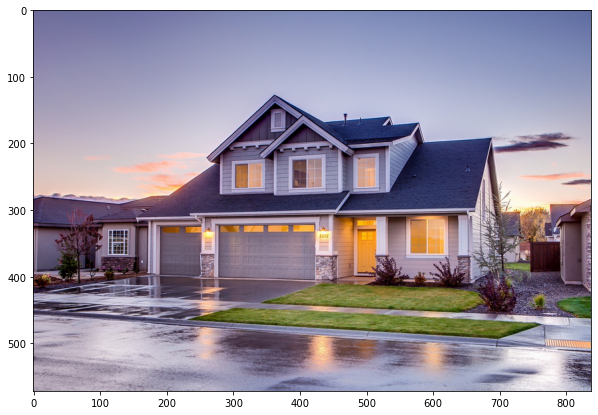

In [47]:
plt.figure(figsize = (10,10))
plt.imshow(img_copy)

### 1. Поиск границ (Оператор Собеля)

Конвертируем в оттенки серого

In [48]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [49]:
img_gray

array([[113, 112, 112, ..., 109, 109, 108],
       [114, 113, 112, ..., 109, 109, 109],
       [114, 113, 113, ..., 110, 109, 109],
       ...,
       [168, 166, 168, ..., 175, 176, 172],
       [167, 166, 167, ..., 157, 176, 171],
       [155, 159, 149, ..., 190, 173, 179]], dtype=uint8)

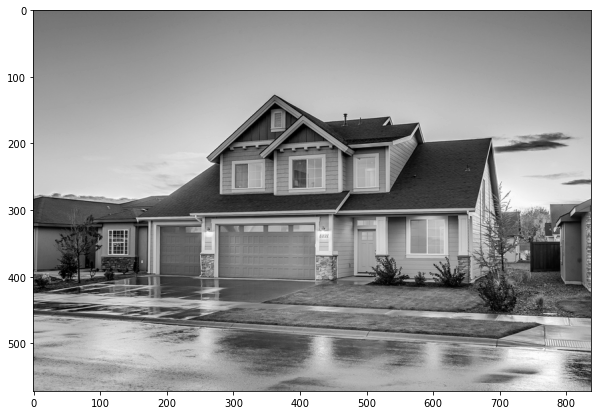

In [50]:
plt.figure(figsize = (10,10))
plt.imshow(img_gray, cmap='gray')

Удаляем шум с помощью фильтра Гаусса

In [59]:
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0)

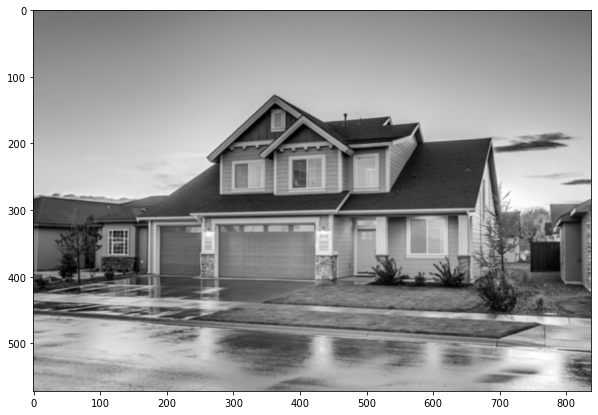

In [76]:
plt.figure(figsize = (10,10))
plt.imshow(img_blur, cmap='gray')

Применим оператор Собеля по осям X, Y и комбинированный по XY

Оператор Собеля по оси X

\begin{bmatrix}
-1 & 0 & +1\\
-2 & 0 & +2\\
-1 & 0 & +1
\end{bmatrix}

In [66]:
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5)

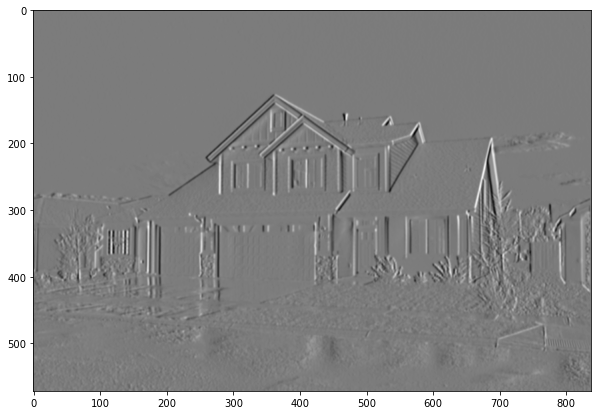

In [67]:
plt.figure(figsize = (10,10))
plt.imshow(sobelx, cmap='gray')

Оператор Собеля по оси Y

\begin{bmatrix}
+1 & +2 & +1\\
0 & 0 & 0\\
-1 & -2 & -1
\end{bmatrix}

In [68]:
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5)

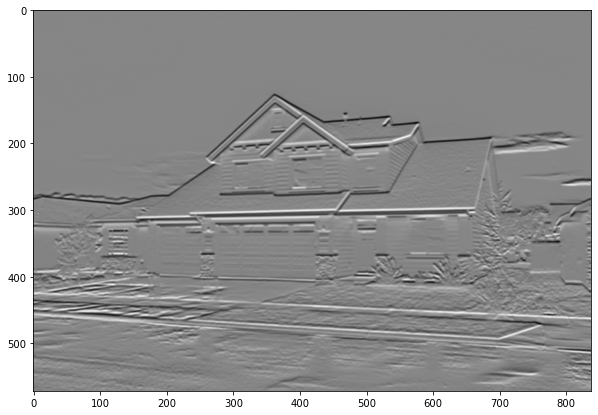

In [71]:
plt.figure(figsize = (10,10))
plt.imshow(sobely, cmap='gray')

Комбинированный оператор Собеля по осям XY

In [74]:
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)

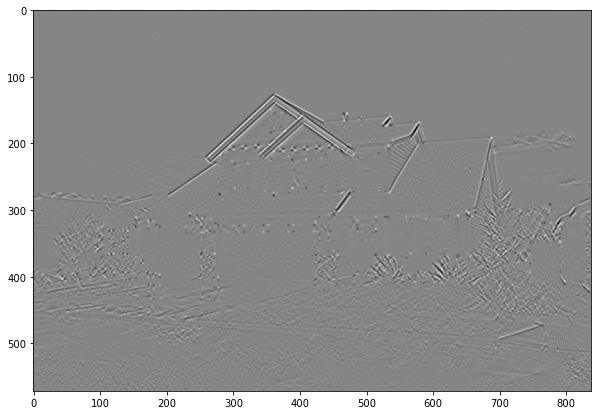

In [75]:
plt.figure(figsize = (10,10))
plt.imshow(sobelxy, cmap='gray')

### 3. Поиск примитивов. Детектор Харриса

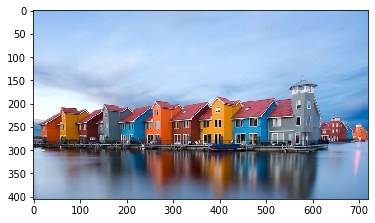

In [16]:
plt.imshow(image_copy, interpolation='nearest')

## Обнаружение углов

Конвертация в оттенки серого

In [6]:
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)
gray = np.float32(gray)

Обнаружение углов с помощью детектора Харриса

In [7]:
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

Расширение углового изображения для улучшения угловых точек

In [9]:
dst = cv2.dilate(dst, None)

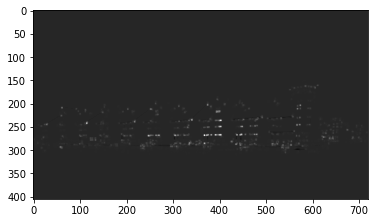

In [10]:
plt.imshow(dst, cmap='gray')

## Извлечение и вывод сильных углов

Пороговое значение

In [11]:
thresh = 0.1*dst.max()

Делаем копию изображения для того, чтобы нарисовать на нём углы

In [12]:
corner_image = np.copy(image_copy)

Перебираем все углы и рисуем их на изображении (если они прошли порог)

In [13]:
for j in range(0, dst.shape[0]):
    for i in range(0, dst.shape[1]):
        if(dst[j,i] > thresh):
            # image, center pt, radius, color, thickness
            cv2.circle( corner_image, (i, j), 1, (0,255,0), 1)

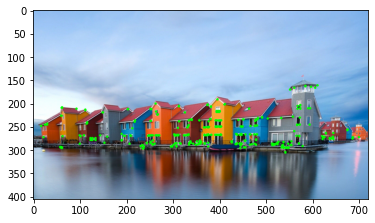

In [14]:
plt.imshow(corner_image)